# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date=[]
lat = []
lng = []
country=[]


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key


query_url =f"{url}appid={key}&units={units}&q="


for city in cities:
    response = requests.get(query_url + city).json()
    try:
        id = response['id']
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        print (f"{city} ID: {id} has been take to the data set")
    except (KeyError, IndexError):
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        date.append(None)
        country.append(None)
        print(f"{city} not found, going to the next one!")

atuona ID: 4020109 has been take to the data set
mataura ID: 6201424 has been take to the data set
harnosand ID: 2707684 has been take to the data set
hermanus ID: 3366880 has been take to the data set
hobart ID: 2163355 has been take to the data set
bluff ID: 2206939 has been take to the data set
havre-saint-pierre ID: 5972291 has been take to the data set
terracina ID: 6541893 has been take to the data set
rikitea ID: 4030556 has been take to the data set
chuy ID: 3443061 has been take to the data set
port elizabeth ID: 964420 has been take to the data set
kodiak ID: 5866583 has been take to the data set
ushuaia ID: 3833367 has been take to the data set
katsuura ID: 2112309 has been take to the data set
montepuez ID: 1037125 has been take to the data set
seoul ID: 1835848 has been take to the data set
tiksi ID: 2015306 has been take to the data set
fernley ID: 5504003 has been take to the data set
carnarvon ID: 2074865 has been take to the data set
cancun ID: 3531673 has been take to

raton ID: 5486795 has been take to the data set
sitka ID: 5557293 has been take to the data set
albertville ID: 4829791 has been take to the data set
saint george ID: 5546220 has been take to the data set
nome ID: 5870133 has been take to the data set
edson ID: 5946820 has been take to the data set
lompoc ID: 5367788 has been take to the data set
flinders ID: 6255012 has been take to the data set
nyuksenitsa ID: 516539 has been take to the data set
manaus ID: 3663517 has been take to the data set
meulaboh ID: 1214488 has been take to the data set
wagar ID: 364027 has been take to the data set
taolanaro not found, going to the next one!
kavieng ID: 2094342 has been take to the data set
miri ID: 1738050 has been take to the data set
laguna ID: 5364271 has been take to the data set
pemangkat ID: 1631637 has been take to the data set
jaora ID: 1269217 has been take to the data set
salalah ID: 286621 has been take to the data set
arraial do cabo ID: 3471451 has been take to the data set
one

aflu not found, going to the next one!
juterbog ID: 2894394 has been take to the data set
tandil ID: 3427833 has been take to the data set
ono ID: 1854026 has been take to the data set
jurilovca ID: 675130 has been take to the data set
okhotsk ID: 2122605 has been take to the data set
tarudant not found, going to the next one!
noboribetsu ID: 2128894 has been take to the data set
barbar not found, going to the next one!
cockburn town ID: 3576994 has been take to the data set
mount gambier ID: 2156643 has been take to the data set
mizdah ID: 2214827 has been take to the data set
ozernovskiy ID: 2122293 has been take to the data set
ayni ID: 1222222 has been take to the data set
belmonte ID: 3470137 has been take to the data set
udalguri ID: 1253977 has been take to the data set
sinnamary ID: 3380290 has been take to the data set
cherskiy ID: 2126199 has been take to the data set
watsa ID: 204283 has been take to the data set
saskylakh ID: 2017155 has been take to the data set
pechora ID

talnakh ID: 1490256 has been take to the data set
phuntsholing ID: 1252484 has been take to the data set
tommot ID: 2015179 has been take to the data set
mackay ID: 2159220 has been take to the data set
caravelas ID: 3466980 has been take to the data set
mason city ID: 4866445 has been take to the data set
glenwood springs ID: 5423092 has been take to the data set
praia ID: 3374333 has been take to the data set
souillac ID: 933995 has been take to the data set
ulladulla ID: 2145554 has been take to the data set
ilfracombe ID: 2646276 has been take to the data set
bolungarvik not found, going to the next one!
ahuimanu ID: 5856516 has been take to the data set
phangnga ID: 1151464 has been take to the data set
iberia ID: 4328254 has been take to the data set
flin flon ID: 5954718 has been take to the data set
manama ID: 290340 has been take to the data set
kerema ID: 2094144 has been take to the data set
north bend ID: 5742974 has been take to the data set
leningradskiy ID: 2123814 has b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {"City":cities,
               "country":country,
               "Latitude":lat,
               "Longitude":lng,
               "Date":date,
               "Max Temp":max_temp,
               "Humidity":humidity,
               "Cloudiness":cloudiness,
               "Wind Speed":wind_speed}


weather_df = pd.DataFrame(weather_dict)


weather_df = weather_df.dropna()
weather_df.head()

,City,country,Latitude,Longitude,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,atuona,PF,-9.80,-139.03,1.583964e+09,82.18,77.0,15.0,11.12
1,mataura,NZ,-46.19,168.86,1.583965e+09,48.38,85.0,44.0,3.04
2,harnosand,SE,62.63,17.94,1.583965e+09,33.01,98.0,20.0,3.36
3,hermanus,ZA,-34.42,19.23,1.583965e+09,70.00,84.0,99.0,8.99
4,hobart,AU,-42.88,147.33,1.583965e+09,59.00,72.0,29.0,9.17


In [47]:
weather_df.to_csv("../output_data/Weather_Output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

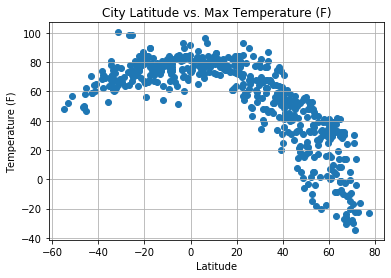

In [48]:
plt.scatter(weather_df['Latitude'], weather_df["Max Temp"])

plt.title(f'City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

plt.savefig("../output_data/LatitudevsTemperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

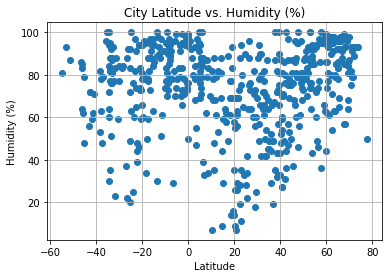

In [49]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/LatitudevsHumidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

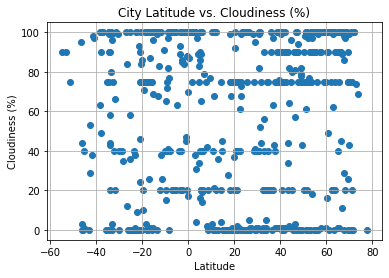

In [50]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/LatitudevsCloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

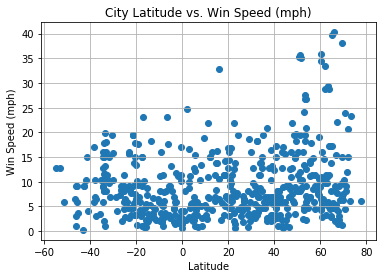

In [51]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Win Speed (mph)")
plt.ylabel("Win Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/LatitudevsWind Speed Plot.png")

plt.show()

## Linear Regression

In [52]:
def Lin_Reg(latitude, variable):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, variable)
    regress_values = latitude * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(latitude, variable)
    plt.plot(latitude,regress_values,"r-")
    plt.annotate(line_eq,(max(latitude)-6,max(variable)-10),fontsize=15,color="red")
    return rvalue

In [53]:
Northern_Hemisphere_df = weather_df.loc[(weather_df["Latitude"]>0),:]
Southern_Hemisphere_df = weather_df.loc[(weather_df["Latitude"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8518789323131882


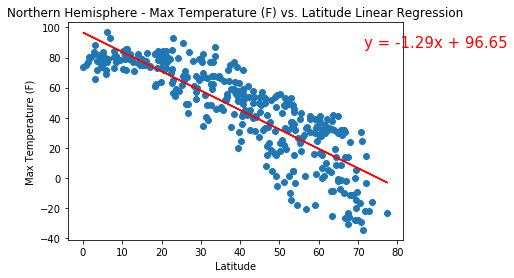

In [62]:
rvalue=Lin_Reg(Northern_Hemisphere_df["Latitude"],Northern_Hemisphere_df["Max Temp"])

plt.title('Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5403015601968161


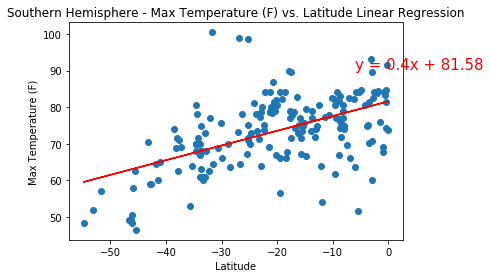

In [55]:
rvalue=Lin_Reg(Southern_Hemisphere_df["Latitude"],Southern_Hemisphere_df["Max Temp"])

plt.title('Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regressio.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30725059775949276


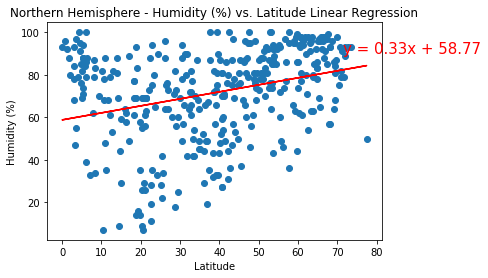

In [56]:
rvalue=Lin_Reg(Northern_Hemisphere_df["Latitude"],Northern_Hemisphere_df["Humidity"])

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2069155211511647


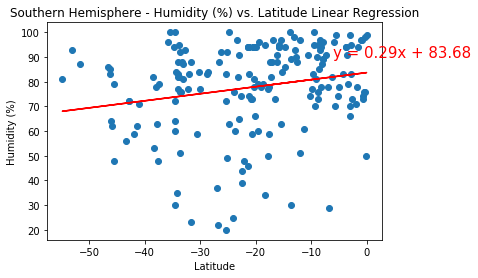

In [57]:
rvalue=Lin_Reg(Southern_Hemisphere_df["Latitude"],Southern_Hemisphere_df["Humidity"])

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20895461012055258


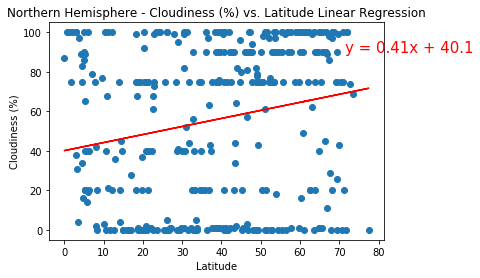

In [58]:
rvalue=Lin_Reg(Northern_Hemisphere_df["Latitude"],Northern_Hemisphere_df["Cloudiness"])

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09934402175552194


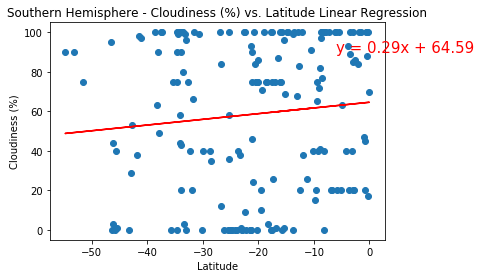

In [59]:
rvalue=Lin_Reg(Southern_Hemisphere_df["Latitude"],Southern_Hemisphere_df["Cloudiness"])

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.211018437615639


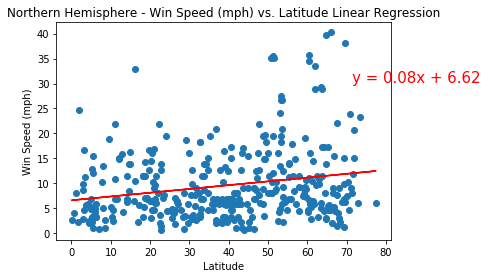

In [60]:
rvalue=Lin_Reg(Northern_Hemisphere_df["Latitude"],Northern_Hemisphere_df["Wind Speed"])

plt.title('Northern Hemisphere - Win Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Win Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2325449191765611


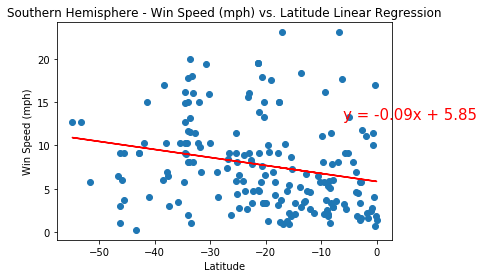

In [61]:
rvalue=Lin_Reg(Southern_Hemisphere_df["Latitude"],Southern_Hemisphere_df["Wind Speed"])

plt.title('Southern Hemisphere - Win Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Win Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()